2. Ансамбли моделей. Бутстреппинг. Бэггинг

In [81]:
import xgboost
import catboost
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import naive_bayes
from catboost.utils import get_confusion_matrix

from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
a = np.array([4.4, 3.8, 4.8, 4.0, 3.4, 4.2, 5.2])
b = a.mean()
np.sum((a - b)**2)/7

0.31673469387755115

In [3]:
data = pd.read_csv('data/wineQualityReds.zip', index_col=0)
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data['quality'] = data['quality'].apply(lambda x: 1 if x >=6 else 0)
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [5]:
X = data.drop('quality', axis=1)
y = data['quality']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [7]:
lr = linear_model.LogisticRegression()

lr.fit(X_train, y_train)

y_test_pred = lr.predict(X_test)

print(f'f1 metric {metrics.f1_score(y_test_pred, y_test)}')

f1 metric 0.7542857142857143


c:\Projects\DS\lessons\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
dt = tree.DecisionTreeClassifier(random_state=42, max_depth=10)

dt.fit(X_train, y_train)

y_test_pred = dt.predict(X_test)

print(f'f1 metric {metrics.f1_score(y_test_pred, y_test)}')

f1 metric 0.7927927927927928


In [9]:
bc = ensemble.BaggingClassifier(estimator=dt, n_estimators=1500, random_state=42)

bc.fit(X_train, y_train)

y_test_pred = bc.predict(X_test)

print(f'f1 metric {metrics.f1_score(y_test_pred, y_test)}')

f1 metric 0.8181818181818182


 3. Случайный лес

In [10]:
data = pd.read_csv('data/boston__1_.zip')

for col in data.columns:
    if type(data[col][0]) is str:
        data[col] = data[col].str.replace(',', '.').astype(float)
data.head()


,crim_rate,zn,business,river,nit_oxiden,rooms,age,dist,highways_index,tax,pup_per_teaс,lower,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


Задание 3.4
4 points possible (graded)
1. Разбейте набор данных на обучающую и тестовую выборку в соотношении 70/30, при разбиении задайте параметр random_state = 13.

Какое получилось среднее значение медианных цен на обучающей выборке? Ответ округлите до двух знаков после точки-разделителя.

  нет ответа 
 
2. Обучите линейную регрессию с параметрами по умолчанию.

В качестве ответа введите ошибку MAE на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя.

  нет ответа 
 

3. Обучите решающее дерево с параметрами по умолчанию и аргументом random_state = 13.

Можно ли, опираясь на результаты, сделать вывод, что алгоритм переобучился?

In [11]:
X = data.drop('target', axis=1)
y = data['target']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 13, test_size = 0.3)

In [13]:
y_train

475    13.3
489     7.0
298    22.5
100    27.5
223    30.1
       ... 
230    24.3
16     23.1
74     24.1
176    23.2
338    20.6
Name: target, Length: 354, dtype: float64

In [14]:
print(f'median train target = {y_train.mean()}')

median train target = 22.77316384180791


In [15]:
linr = linear_model.LinearRegression()


linr.fit(X_train, y_train)

y_test_pred = linr.predict(X_test)

print(f'MAE metric {metrics.mean_absolute_error(y_test_pred, y_test)}')

MAE metric 3.7222793958561513


In [16]:
trreg = tree.DecisionTreeRegressor(random_state=13)

trreg.fit(X_train, y_train)

y_test_pred = trreg.predict(X_test)
y_train_pred = trreg.predict(X_train)

print(f'MAE tests metric {metrics.mean_absolute_error(y_test_pred, y_test)}')
print(f'MAE train metric {metrics.mean_absolute_error(y_train_pred, y_train)}')

MAE tests metric 2.8388157894736845
MAE train metric 0.0


In [17]:
for n in [3, 10, 100, 500]:
    rand_tree = ensemble.RandomForestRegressor(n_estimators=n, random_state=13)
    
    rand_tree.fit(X_train, y_train)

    y_test_pred = rand_tree.predict(X_test)
    y_train_pred = rand_tree.predict(X_train)

    print(f'MAE tests metric {metrics.mean_absolute_error(y_test_pred, y_test)}')
    print(f'MAE train metric {metrics.mean_absolute_error(y_train_pred, y_train)}\n')

MAE tests metric 2.9328947368421057
MAE train metric 1.017231638418079

MAE tests metric 2.466315789473684
MAE train metric 0.9755367231638419

MAE tests metric 2.2559736842105265
MAE train metric 0.8717740112994352

MAE tests metric 2.2365657894736892
MAE train metric 0.8478135593220345



4. Случайный лес. Практика

In [18]:
data = pd.read_csv('data/weatherAUS.zip')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Задание 4.1
1 point possible (graded)
Сколько суммарно пропусков в данных?

In [19]:
print(f'Кол-во пропусков = {data.isna().sum().sum()}')

Кол-во пропусков = 343248


Задание 4.2
1 point possible (graded)
В некоторых признаках пропусков более 40 % — удалите такие признаки. Сколько их было?

In [20]:
columns_to_drop = []
for col in data.columns:
    if data[col].isna().sum()/145460 >=0.4:
        columns_to_drop.append(col)
        
columns_to_drop

['Evaporation', 'Sunshine', 'Cloud3pm']

In [21]:
data = data.drop(columns_to_drop, axis=1)
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

Задание 4.3
1 point possible (graded)
Теперь обработаем признаки RainToday и RainTomorrow таким образом, чтобы вместо yes было значение 1, а вместо no — значение 0. Обратите внимание на то, что в признаках RainToday и RainTomorrow присутствуют пропуски, и их трогать не нужно, они должны остаться пропусками. Поэтому обрабатывайте столбцы таким образом, чтобы не видоизменить пропущенные значения.

Вычислите среднее арифметическое для преобразованного признака RainToday и запишите его в ответ, предварительно округлив до двух знаков после точки-разделителя.

In [22]:
def to_binary(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    else:
        return x
    

In [23]:
data['RainToday'] = data['RainToday'].apply(to_binary)
data['RainTomorrow'] = data['RainTomorrow'].apply(to_binary)

In [24]:
print(f"Среднее арифметическое = {data['RainToday'].mean()}")

Среднее арифметическое = 0.22419285648984874


Задание 4.4
1 point possible (graded)
Обработайте признак Date таким образом, чтобы выделить в отдельный признак Month (номер месяца). Изначальный признак Date удалите. Определите, какой месяц имеет самую большую часть дождливых дней относительно всех дней месяца. В качестве ответа введите порядковый номер месяца.

In [25]:
data['Month'] = pd.to_datetime(data['Date'], yearfirst=True).dt.month

print(f"Относительное количество дождливых дней \n {data[['Month', 'RainToday']].groupby('Month').mean('RainToday')}")

Относительное количество дождливых дней 
        RainToday
Month           
1       0.189484
2       0.206746
3       0.217135
4       0.216845
5       0.222163
6       0.263638
7       0.270736
8       0.253167
9       0.229135
10      0.196512
11      0.210843
12      0.213037


In [26]:
data = data.drop('Date', axis=1)
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow', 'Month'],
      dtype='object')

Задание 4.5
1 point possible (graded)
Обработайте оставшиеся категориальные признаки. С помощью метода get_dummies с настройками по умолчанию создайте dummy-переменные для всех категориальных признаков (их пять), которые есть в данных на этот момент.

Кодировку признаков важно выполнить именно в следующем порядке: categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']. Это необходимо для того, чтобы ваши дальнейшие ответы сходились с нашим решением, так как алгоритм случайного леса, который мы будем использовать в дальнейшем, чувствителен к порядку столбцов. Аргумент categoricals передаётся в функцию pd.get_dummies() с использованием ключевого слова columns, а именно columns=categoricals.

Сколько теперь признаков в данных, если считать целевую переменную?

In [27]:
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

data = pd.get_dummies(data, columns=categoricals)

In [28]:
print(f'Кол-во признаков = {len(data.columns)}')

Кол-во признаков = 124


Задание 4.6
1 point possible (graded)
Осталось совсем немного. Удалите все строки, где есть пропуски. Далее разбейте данные на обучающую и тестовую выборки в соотношении 70/30, в качестве значения параметра random_state возьмите число 31.

Каково среднее значение целевой переменной на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя.

In [29]:
d_data = data.dropna(axis=0, how='any')

X = d_data.drop('RainTomorrow', axis=1)
y = d_data['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 31, test_size = 0.3)

In [30]:
print(f'Среднее в тестовой выборке = {y_test.mean()}')

Среднее в тестовой выборке = 0.22770253002811142


In [31]:
d_data.shape

(78257, 124)

Задание 4.7
1 point possible (graded)
Теперь давайте вспомним про бутстреп. Он не понадобится нам для решения этой задачи, но будет полезно реализовать его «вручную».

Сделайте оценку стандартного отклонения для среднего значения минимальной температуры для обучающей выборки (то есть для среднего значения по признаку MinTemp). Для этого сгенерируйте 1000 случайных выборок из наших данных — каждая из них должна быть такого же объёма, как и обучающая выборка. Для генерации выборки используйте np.random.randint(): сгенерируйте необходимое количество индексов и по ним извлеките соответствующие элементы выборки. Случайность фиксируйте с помощью np.random.seed(31).

Для каждой выборки вычислите среднее значение, а после найдите стандартное отклонение для этих значений. Ответ округлите до двух знаков после точки-разделителя.

In [32]:
np.random.seed(31)
num = np.random.randint(low=0, high=d_data.shape[0], size=[1000, d_data.shape[0]],)
num.shape

(1000, 78257)

In [33]:
num.shape[1]

78257

In [34]:
# mean =[]
# for raw in range(num.shape[0]):
#     sum_of_items = 0
#     for elem in  num[raw]:
#         sum_of_items += d_data['MinTemp'].iloc[elem]
#         # print(sum_of_items)
#     mean.append(sum_of_items/d_data.shape[0])
    

In [35]:
# pd.DataFrame(mean).std()

In [36]:
def gbs(data, n):     
    inds = np.random.randint(0, len(data), (n, len(data))) #определяем индексы случайным образом
    numbers = data[inds] #выбираем значения по индексам
    return numbers
target = X_train['MinTemp'].values #выбираем целевую переменную
np.random.seed(31) #задаём параметр генератора случайных чисел
mean_values = [np.mean(x) for x in gbs(target, 1000)] #получаем все средние значения
np.std(mean_values) #находим для них стандартное отклонение

0.02879072820657669

Задание 4.8
1 point possible (graded)
Теперь можно перейти к обучению прогностических моделей. Начнём с того, что построим простейшую логистическую регрессию (без настройки гиперпараметров). Это будет та модель, с качеством которой мы будем сравнивать результаты, полученные далее.

В качестве ответа введите значение метрики roc_auc на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя.

In [37]:
log_reg = linear_model.LogisticRegression()

log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

print(f'ROG AUC test = {metrics.roc_auc_score(y_test, y_test_pred)}')


ROG AUC test = 0.7274138237536282


c:\Projects\DS\lessons\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
preds_train = clf.predict(X_train)
preds_test = clf.predict(X_test)
metrics.roc_auc_score(y_test, preds_test)

c:\Projects\DS\lessons\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7274138237536282

Задание 4.9
4 points possible (graded)
Теперь попробуйте обучить на наших данных другой алгоритм — дерево решений. С помощью GridSearchCV сделайте перебор гиперпараметров по следующей сетке:

params = {'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3, 4], 'max_depth': [5,7,9,11]}
Для параметра кросс-валидации cv задайте значение 3. Для решающего дерева определите параметр random_state=42. Остальные параметры оставьте по умолчанию.

1. Вычислите значение roc_auc для решающего дерева с гиперпараметрами, определёнными в качестве оптимальных. Ответ округлите до двух знаков после точки-разделителя.

  нет ответа 
 
2. Какие значения гиперпараметров были выбраны как оптимальные?
max_depth:
  нет ответа 
 
max_leaf_nodes:
  нет ответа 
 
min_samples_split:

In [39]:
params = {'max_leaf_nodes': list(range(2, 10)), 
          'min_samples_split': [2, 3, 4], 
          'max_depth': [5,7,9,11]}

grid_search = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=42), 
    param_grid=params, 
    cv=3, 
    n_jobs = -1
)  
%time grid_search.fit(X_train, y_train) 

y_test_pred = grid_search.predict(X_test)

grid_tree = tree.DecisionTreeClassifier(random_state=42, **grid_search.best_params_)

grid_tree.fit(X_train, y_train)
y_test_pred = grid_tree.predict(X_test)

print(f'ROG AUC на тестовом наборе: {metrics.roc_auc_score(y_test, y_test_pred):.3f}')
print(f"Наилучшие значения гиперпараметров: {grid_search.best_params_}")

CPU times: total: 7.75 s
Wall time: 42 s
ROG AUC на тестовом наборе: 0.703
Наилучшие значения гиперпараметров: {'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2}


Задание 4.10
1 point possible (graded)
К сожалению, деревья решений не помогли нам в улучшении качества модели, так что попробуем ещё уменьшить ошибку с помощью ансамблей.

Теперь постройте случайный лес, включающий 100 деревьев. Задайте параметр random_state=31. Остальные параметры оставьте по умолчанию.

Какой теперь будет метрика roc_auc на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя.



In [40]:
rand_for = ensemble.RandomForestClassifier(n_estimators=100, random_state=31)

rand_for.fit(X_train, y_train)

y_train_pred = rand_for.predict(X_train)
y_test_pred = rand_for.predict(X_test)

print(f'ROG AUC test = {metrics.roc_auc_score(y_test, y_test_pred)}')

ROG AUC test = 0.7329684570290497


Задание 4.11
1 point possible (graded)
Основные параметры, которые отвечают за качество обучения в случайном лесе, следующие:'max_features', 'min_samples_leaf', 'max_depth'.

Возьмите случайный лес из 100 деревьев и найдите оптимальную комбинацию этих трёх параметров. Сетка для перебора следующая:

{'max_features': [ 4, 5, 6, 7], 'min_samples_leaf': [3, 5, 7, 9, 11], 'max_depth': [5, 10, 15]}
Перебор осуществите с помощью GridSearchCV. Для параметра кросс-валидации cv задайте значение 3. Случайности фиксируйте параметром random_state = 31. Остальные значения оставьте по умолчанию.

Какое значение roc_auc получилось для оптимальных гиперпараметров?

In [41]:
params = {'max_features': [ 4, 5, 6, 7], 
          'min_samples_leaf': [3, 5, 7, 9, 11], 
          'max_depth': [5, 10, 15]}

grid_search = GridSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=31, n_estimators=100), 
    param_grid=params, 
    cv=3, 
    n_jobs = -1
)  
%time grid_search.fit(X_train, y_train) 

y_test_pred = grid_search.predict(X_test)
print(f'ROG AUC на тестовом наборе: {metrics.roc_auc_score(y_test, y_test_pred):.2f}')
print(f"Наилучшие значения гиперпараметров: {grid_search.best_params_}")

CPU times: total: 14.7 s
Wall time: 3min 19s
ROG AUC на тестовом наборе: 0.70
Наилучшие значения гиперпараметров: {'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 3}


Задание 4.12
2 points possible (graded)
Как мы говорили в предыдущем юните, благодаря случайному лесу можно узнать, какие признаки оказывают большее влияние на целевую переменную по сравнению с другими.

Оцените значимость признаков. Отметьте три признака, которые дают наибольший вклад в целевую переменную (в каждой колонке находится как минимум один верный вариант ответа):

In [42]:
grid_tree = ensemble.RandomForestClassifier(random_state=42, **grid_search.best_params_)

grid_tree.fit(X_train, y_train)
grid_tree.feature_importances_



array([3.15668493e-02, 2.99173635e-02, 8.98921442e-02, 5.64654473e-02,
       1.61674032e-02, 1.94579644e-02, 6.60466009e-02, 2.45610055e-01,
       5.41515648e-02, 6.07512442e-02, 7.70813138e-02, 2.51239836e-02,
       4.18834868e-02, 5.63809875e-02, 1.99002976e-03, 1.05162890e-03,
       1.35020626e-03, 1.34423317e-03, 1.46757876e-03, 1.68059522e-03,
       1.52460833e-03, 1.64392643e-03, 1.50867014e-03, 1.36089197e-03,
       1.20624776e-03, 1.50673000e-03, 0.00000000e+00, 0.00000000e+00,
       6.99719439e-04, 1.42041754e-03, 0.00000000e+00, 1.17306046e-03,
       6.15020418e-04, 1.47106399e-03, 2.92821402e-03, 9.76324114e-04,
       6.26653773e-04, 2.33491531e-03, 0.00000000e+00, 1.69637617e-03,
       0.00000000e+00, 1.16406692e-03, 2.66744882e-04, 0.00000000e+00,
       7.69180087e-04, 1.08362384e-03, 1.52200982e-03, 6.27615784e-04,
       1.64604468e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.17250906e-03, 8.31293458e-04, 8.78486930e-04,
      

In [43]:
fig = px.histogram(
    x=X.columns,
    y = grid_tree.feature_importances_,
    labels={'salary_in_usd': "зарплата (USD)", 'y': 'Распределение'},
    title='Распределение зароботной платы в долларах США',
    # marginal='box',
    )

fig.show()

6. Бустинг. Практика

In [44]:
air_data = pd.read_csv('data/AirPass.zip', index_col=0)
air_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [45]:
!pip install xgboost
!pip install catboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Задание 6.1
1/1 point (graded)
Для начала сделаем небольшую предобработку данных. Сколько всего в данных пропущенных значений?

In [46]:
print(f'Nan values count in data is {air_data.isna().sum().sum()}')

Nan values count in data is 310


Задание 6.2
1 point possible (graded)
Теперь давайте избавимся от найденных пропусков. Заполните их все медианными значениями. После этого вычислите среднее арифметическое для признака, отражающего задержку при прибытии в минутах. Ответ округлите до двух знаков после точки-разделителя.

In [47]:
air_data.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [48]:
air_data['Arrival Delay in Minutes'] = air_data['Arrival Delay in Minutes'].fillna(air_data['Arrival Delay in Minutes'].median())

In [49]:
print(f"Mead value of rrival Delay in Minutes {round(air_data['Arrival Delay in Minutes'].mean(), 2)}")

Mead value of rrival Delay in Minutes 15.13


Задание 6.3
3 points possible (graded)
Проведём небольшой разведывательный анализ. Посмотрим, в каких категориях пассажиров превалировали удовлетворённые полетом клиенты.

Совет: для ответов на вопросы попробуйте использовать как вычисления, так и визуализации.



<Axes: xlabel='satisfaction', ylabel='Age'>

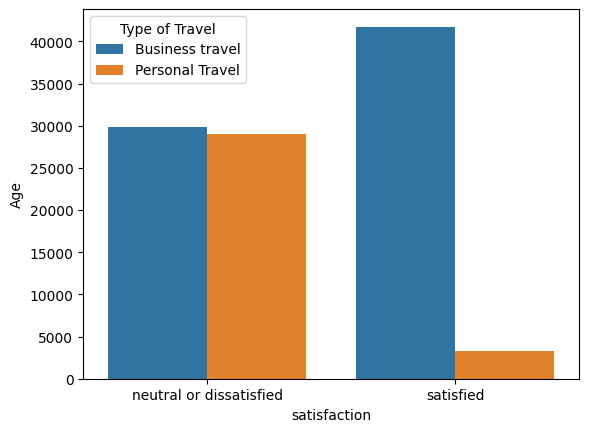

In [50]:
gender_data = pd.pivot_table(air_data[['Type of Travel', 'satisfaction', 'Age']], index=['Type of Travel', 'satisfaction'], aggfunc='count',).reset_index()
sns.barplot(
    x= gender_data['satisfaction'],
    y= gender_data['Age'],
    hue=gender_data['Type of Travel']
    ,
)

<Axes: xlabel='satisfaction', ylabel='Age'>

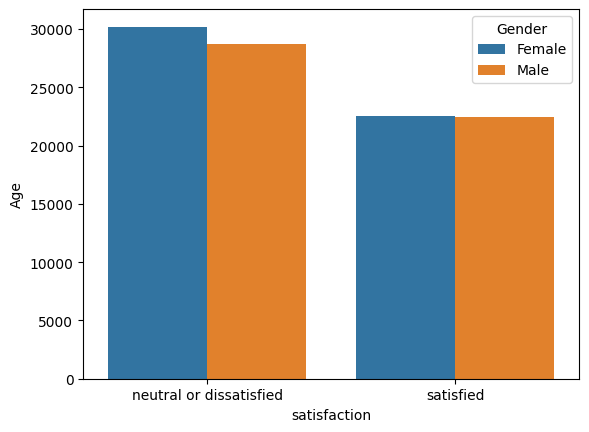

In [51]:
gender_data = pd.pivot_table(air_data[['Gender', 'satisfaction', 'Age']], index=['Gender', 'satisfaction'], aggfunc='count',).reset_index()
sns.barplot(
    x= gender_data['satisfaction'],
    y= gender_data['Age'],
    hue=gender_data['Gender']
    ,
)

<Axes: xlabel='satisfaction', ylabel='Age'>

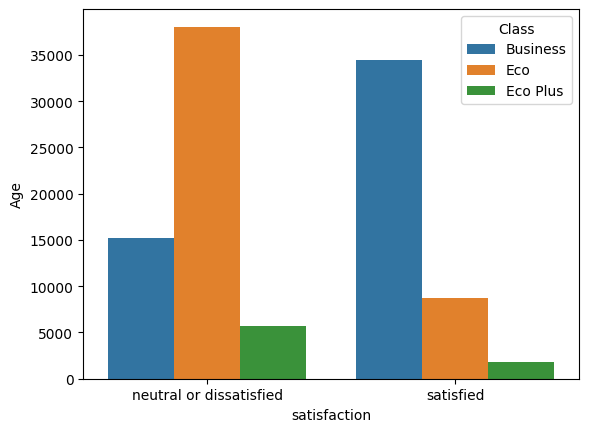

In [52]:
gender_data = pd.pivot_table(air_data[['Class', 'satisfaction', 'Age']], index=['Class', 'satisfaction'], aggfunc='count',).reset_index()
sns.barplot(
    x= gender_data['satisfaction'],
    y= gender_data['Age'],
    hue=gender_data['Class']
    ,
)

In [53]:
air_data['satisfaction'] = air_data['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
air_data['Customer Type'] = air_data['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
air_data['Type of Travel'] = air_data['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
air_data['Gender'] = air_data['Gender'].map({'Male': 0, 'Female': 1})

Задание 6.4
1 point possible (graded)
Для остальных категориальных признаков создайте dummy-переменные. Сделайте это с помощью функции get_dummies() из библиотеки Pandas, параметры не меняйте. Сколько теперь признаков в данных (включая целевую переменную)?

In [54]:
# categoricals = list(air_data.columns)

# for i in ['satisfaction', 'Customer Type', 'Type of Travel', 'Gender']:
#     categoricals.remove(i)
# categoricals
data = pd.get_dummies(air_data, columns=['Class'])

print(f'columns count is {len(data.columns)}')

columns count is 26


Задание 6.5
1 point possible (graded)
Мы практически добрались до обучения модели. Разбейте данные на обучающую и тестовую выборки в соотношении 80/20, параметр random_state = 26. Сколько наблюдений попало в тестовую выборку?

In [55]:
X = data.drop('satisfaction', axis=1)
y = data['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 26, test_size = 0.2)

In [56]:
print(f'Test data count is {X_test.shape[0]}')

Test data count is 20781


Задание 6.6
1 point possible (graded)
Теперь нам необходимо реализовать масштабирование данных. Для этого обучите на обучающей выборке метод StandardScaler() и с помощью него преобразуйте и обучающую, и тестовую выборки. Не забудьте, что целевую переменную обрабатывать не нужно.

Примечание. Отметим, что если бы дальше мы работали только с деревьями, масштабирование бы не требовалось. Однако мы реализуем его, чтобы можно было обучать и другие модели и сравнивать полученные результаты.

В качестве ответа введите самое первое значение из матрицы преобразованных признаков тестовой выборки. Округлите значение до двух знаков после точки-разделителя.

In [57]:
s_s =preprocessing.StandardScaler()

s_s.fit(X_train)
X_train = s_s.transform(X_train)
X_test = s_s.transform(X_test)

In [58]:
print(f'First value of X_test is {X_test[0][0]}')

First value of X_test is 0.9408251379303


Задание 6.7
1 point possible (graded)
Перейдём к обучению моделей. В качестве первой модели возьмём самую простую — логистическую регрессию. Мы делаем это для того, чтобы потом сравнивать с ней полученные результаты: так вы сможете выяснить, насколько ансамбли смогут улучшить точность прогноза.

Обучите логистическую регрессию с параметрами по умолчанию на наших данных. В качестве ответа введите значение метрики f1_score. Ответ округлите до трёх знаков после точки-разделителя.

In [59]:
lr_r = linear_model.LogisticRegression()

lr_r.fit(X_train, y_train)

y_train_pred = lr_r.predict(X_train)
y_test_pred = lr_r.predict(X_test)

print(f'F1 train score  = : {metrics.f1_score(y_train, y_train_pred):.3f}')
print(f'F1 test score  = : {metrics.f1_score(y_test, y_test_pred):.3f}')

F1 train score  = : 0.854
F1 test score  = : 0.855


Задание 6.8
1 point possible (graded)
Теперь перейдём к бустингу. Начнём с обучения первой модели — AdaBoost. В качестве базовой модели для неё возьмите решающее дерево с параметром random_state = 26.

Обучите AdaBoost, зафиксировав random_state со значением 26 и задав темп обучения 0.01. В качестве ответа введите значение метрики f1_score. Ответ округлите до трёх знаков после точки-разделителя.

In [60]:
ad_b = ensemble.AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(random_state=26), random_state=26, learning_rate=0.01)

ad_b.fit(X_train, y_train)

y_train_pred = ad_b.predict(X_train)
y_test_pred = ad_b.predict(X_test)

print(f'F1 train score  = : {metrics.f1_score(y_train, y_train_pred):.4f}')
print(f'F1 test score  = : {metrics.f1_score(y_test, y_test_pred):.4f}')

c:\Projects\DS\lessons\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



F1 train score  = : 1.0000
F1 test score  = : 0.9405


Задание 6.9
1 point possible (graded)
Перейдем к следующему алгоритму — градиентному бустингу.

Будем настраивать количество деревьев и темп обучения, делая перебор по следующей сетке:

params = {"n_estimators":2**np.arange(8), "learning_rate":0.1**np.arange(3)}
Используйте для поиска оптимальных параметров GridSearchCV, а для ускорения работы алгоритма задайте параметр кросс-валидации, равный 3.

Какое наибольшее значение метрики f1_score получилось? Ответ округлите до трёх знаков после точки-разделителя.

Примечание. Необходимо указать лучший результат в методе GridSearchCV на тренировочных данных.

In [61]:
params = {"n_estimators":2**np.arange(8), 
          "learning_rate":0.1**np.arange(3)}

grid_search = GridSearchCV(
    estimator=ensemble.GradientBoostingClassifier(), 
    param_grid=params, 
    scoring='f1',
    cv=3, 
    n_jobs = -1
)  
%time grid_search.fit(X_train, y_train) 

y_test_pred = grid_search.predict(X_test)
y_train_pred = grid_search.predict(X_train)

print(f'F1 test data: {metrics.f1_score(y_test, y_test_pred):.4f}')
print(f'F1 train data: {metrics.f1_score(y_train, y_train_pred):.4f}')
print(f"Наилучшие значения гиперпараметров: {grid_search.best_params_}")

CPU times: total: 33.9 s
Wall time: 3min 22s
F1 test data: 0.9506
F1 train data: 0.9613
Наилучшие значения гиперпараметров: {'learning_rate': 1.0, 'n_estimators': 128}


In [62]:
grid_search.best_score_

0.9491404957574865

Задание 6.10
1 point possible (graded)
Обучите алгоритм XGBoost. Так как он достаточно мощный «из коробки», определите его с параметрами по умолчанию, только задайте random_state = 26. Какое значение метрики f1_score получилось? Ответ округлите до трёх знаков после точки-разделителя.

Подсказка. Для того чтобы обучить алгоритм XGBoost для решения задачи классификации, вам понадобится XGBClassifier из библиотеки xgboost, установленной ранее. Вся дальнейшая последовательность действий (обучение модели, предсказание, оценка качества) идентична другим алгоритмам, например логистической регрессии.

In [63]:
xg_b = xgboost.XGBClassifier(random_state=26)

xg_b.fit(X_train, y_train)

y_train_pred = xg_b.predict(X_train)
y_test_pred = xg_b.predict(X_test)

print(f'F1 train score  = : {metrics.f1_score(y_train, y_train_pred):.4f}')
print(f'F1 test score  = : {metrics.f1_score(y_test, y_test_pred):.4f}')

F1 train score  = : 0.9761
F1 test score  = : 0.9574


Задание 6.11
1 point possible (graded)
Обучите алгоритм CatBoost. Как и XGBoost, будем обучать его с настройками по умолчанию и заданным random_state = 26. Какое значение метрики f1_score получилось? Ответ округлите до трёх знаков после точки-разделителя.

Подсказка. Для того чтобы обучить алгоритм CatBoost, вам понадобится CatBoostClassifier() из библиотеки catboost, установленной ранее. Вся дальнейшая последовательность действий (обучение модели, предсказание, оценка качества) идентична другим алгоритмам, например логистической регрессии.

In [64]:
cat_b = catboost.CatBoostClassifier(random_state=26)

cat_b.fit(X_train, y_train)

y_train_pred = cat_b.predict(X_train)
y_test_pred = cat_b.predict(X_test)

print(f'F1 train score  = : {metrics.f1_score(y_train, y_train_pred):.4f}')
print(f'F1 test score  = : {metrics.f1_score(y_test, y_test_pred):.4f}')

Learning rate set to 0.068023
0:	learn: 0.6018089	total: 227ms	remaining: 3m 47s
1:	learn: 0.5020769	total: 273ms	remaining: 2m 16s
2:	learn: 0.4472481	total: 304ms	remaining: 1m 40s
3:	learn: 0.4028675	total: 338ms	remaining: 1m 24s
4:	learn: 0.3674724	total: 373ms	remaining: 1m 14s
5:	learn: 0.3397844	total: 407ms	remaining: 1m 7s
6:	learn: 0.3121211	total: 438ms	remaining: 1m 2s
7:	learn: 0.2917499	total: 469ms	remaining: 58.2s
8:	learn: 0.2749039	total: 501ms	remaining: 55.2s
9:	learn: 0.2575191	total: 532ms	remaining: 52.6s
10:	learn: 0.2473690	total: 563ms	remaining: 50.6s
11:	learn: 0.2377531	total: 594ms	remaining: 48.9s
12:	learn: 0.2279309	total: 624ms	remaining: 47.4s
13:	learn: 0.2212512	total: 659ms	remaining: 46.4s
14:	learn: 0.2100359	total: 694ms	remaining: 45.5s
15:	learn: 0.2025733	total: 726ms	remaining: 44.7s
16:	learn: 0.1942303	total: 758ms	remaining: 43.8s
17:	learn: 0.1877939	total: 792ms	remaining: 43.2s
18:	learn: 0.1832381	total: 824ms	remaining: 42.6s
19:	le

Задание 6.12
4 points possible (graded)
Выведите матрицу ошибок для алгоритма, который получил наилучшие показатели качества модели на обучающей выборке (будем считать, что оцениваем по f1_score). Матрица ошибок выводится в следующем формате:

Матрица ошибок
Значения в матрице ошибок переведите в проценты от общего числа наблюдений в обучающей выборке и округлите до целых.

Подсказка. Для того чтобы построить матрицу ошибок в CatBoost, необходимо использовать следующий шаблон:

get_confusion_matrix(модель, Pool(признаки обучающей выборки, целевая переменная обучающей выборки))

Более подробно построение матрицы ошибок можно изучить в документации.

Заполните соответствующие значения (в процентах от общего числа наблюдений в обучающей выборке, округленных до целого):

In [65]:
cm = get_confusion_matrix(cat_b, catboost.Pool(X_train, y_train))
cm/X_train.shape[0]

array([[0.56134884, 0.00655655],
       [0.01532668, 0.41676792]])

Задание 6.13
1 point possible (graded)
Оцените важность признаков для модели из предыдущего задания. Отметьте признак, который оказывает наибольшее влияние на значение целевой переменной:

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'id'),
  Text(1, 0, 'Gender'),
  Text(2, 0, 'Customer Type'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'Type of Travel'),
  Text(5, 0, 'Flight Distance'),
  Text(6, 0, 'Inflight wifi service'),
  Text(7, 0, 'Departure/Arrival time convenient'),
  Text(8, 0, 'Ease of Online booking'),
  Text(9, 0, 'Gate location'),
  Text(10, 0, 'Food and drink'),
  Text(11, 0, 'Online boarding'),
  Text(12, 0, 'Seat comfort'),
  Text(13, 0, 'Inflight entertainment'),
  Text(14, 0, 'On-board service'),
  Text(15, 0, 'Leg room service'),
  Text(16, 0, 'Baggage handling'),
  Text(17, 0, 'Checkin service'),
  Text(18, 0, 'Inflight service'),
  Text(19, 0, 'Cleanliness'),
  Text(20, 0, 'Departure Delay in Minutes'),
  Text(21, 0, 'Arrival Delay in Minutes'),
  Text(22, 0, 'Class_Business'),
  Text(23, 0, 'Class_Eco'),
  Text(24, 0, 'Class_Eco Plus')])

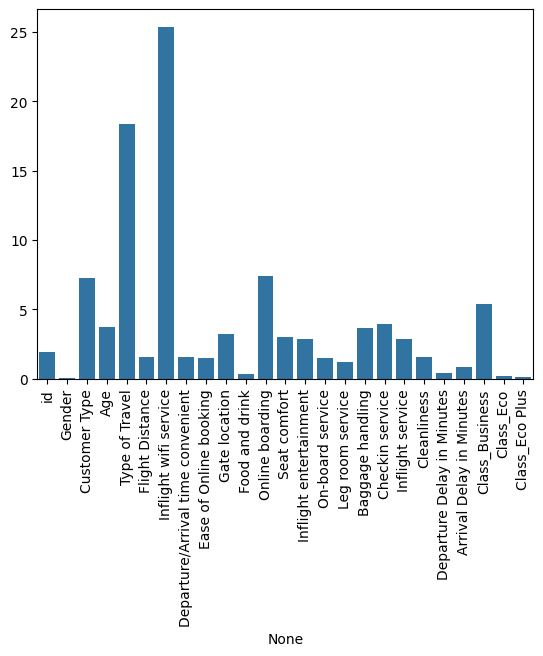

In [66]:
sns.barplot(
    y = cat_b.feature_importances_,
    x = X.columns)

plt.xticks(rotation=90)

7. Стекинг

Задание 7.5
1 point possible (graded)
Для начала обучите на наших данных случайный лес с десятью решающими деревьями. Воспользуйтесь параметрами по умолчанию. В качестве значения random_state возьмите число 42.

Оцените значение -меры и введите его в качестве ответа, предварительно округлив до двух знаков после точки-разделителя.

In [75]:
data = pd.read_csv('data/Frogs_MFCCs.zip')
data.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [76]:
data['Family'] = data['Family'].apply(lambda x: 1 if x == 'Dendrobatidae' else 0)

In [77]:
data = data.drop([ 'Genus', 'Species', 'RecordID'], axis=1)
data.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,0
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,0
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,0
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,0
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,0


In [78]:
X = data.drop('Family', axis=1)
y = data['Family']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 31, test_size = 0.2)

In [79]:
rand_for = ensemble.RandomForestClassifier(n_estimators=10, random_state=42)

rand_for.fit(X_train, y_train)

y_train_pred = rand_for.predict(X_train)
y_test_pred = rand_for.predict(X_test)

print(f'F1 train = {metrics.f1_score(y_train, y_train_pred)}')
print(f'F1 test = {metrics.f1_score(y_test, y_test_pred)}')

F1 train = 0.9988826815642458
F1 test = 0.9726775956284153


Теперь попробуем улучшить качество нашего предсказания за счёт использования стекинга.

В качестве базовых моделей выберите следующие:

случайный лес с десятью деревьями, random_state = 31;
KNN, количество соседей = 11;
наивный байесовский классификатор с параметрами по умолчанию, в качестве метода возьмите GaussianNB().
В качестве метамодели выберите логистическую регрессию.

Обучите модели и сделайте предсказание целевой метки для тестового набора данных.

Рассчитайте -меру для тестового набора данных и введите её в качестве ответа, предварительно округлив до двух знаков после точки-разделителя.

In [84]:
rand_for = ensemble.RandomForestClassifier(n_estimators=10, random_state=31)
knn = neighbors.KNeighborsClassifier(n_neighbors=11)
bayes = naive_bayes.GaussianNB()

stack = ensemble.StackingClassifier(estimators=[('rf', rand_for), ('knn', knn), ('bayes', bayes)], final_estimator=linear_model.LogisticRegression())

stack.fit(X_train, y_train)

y_train_pred = stack.predict(X_train)
y_test_pred = stack.predict(X_test)

print(f'F1 train = {metrics.f1_score(y_train, y_train_pred)}')
print(f'F1 test = {metrics.f1_score(y_test, y_test_pred)}')

F1 train = 0.9988851727982163
F1 test = 0.989247311827957
